# <span style="color:blue"> M6U1: Kaggle </span> <h3><span style="color:red">Kaggle Competition (Late Submission) 
    
**K. Tuba Turkcan Karaca**


 **1) Bike Sharing Demand: Forecast use of a city bikeshare system (https://www.kaggle.com/c/bike-sharing-demand)**

* Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

* The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

* You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

**Data Description**

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.


**Data Fields**

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train_df.shape

(10886, 12)

In [6]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [8]:
test_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [9]:
combine = pd.concat([train_df,test_df])
combine.head()
#combine.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [10]:
combine.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
combine.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

In [12]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(combine['datetime'])
combine.set_index(dt, inplace=True)

combine['date'] = dt.date
combine['day'] = dt.day
combine['month'] = dt.month
combine['year'] = dt.year
combine['hour'] = dt.hour
combine['dayofweek'] = dt.dayofweek
combine['weekofyear'] = dt.weekofyear

In [13]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,year,hour,dayofweek,weekofyear
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,1,1,2011,0,5,52
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,1,2011,1,5,52
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,1,1,2011,2,5,52
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,1,1,2011,3,5,52
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,1,1,2011,4,5,52


In [14]:
combine.weekofyear.value_counts()

52    379
1     353
16    336
41    336
38    336
32    336
39    336
24    336
40    336
25    336
26    336
21    336
27    336
43    336
28    336
29    336
30    336
46    336
31    336
22    336
23    336
47    336
50    336
17    336
33    336
20    336
49    336
35    336
18    336
19    336
14    335
45    335
13    335
37    335
51    335
42    335
36    334
15    334
48    334
12    333
7     333
5     333
11    332
9     332
6     330
2     330
10    330
8     324
34    323
3     320
4     307
44    300
Name: weekofyear, dtype: int64

In [15]:
combine.drop(['datetime', 'date'], inplace=True, axis=1)

In [16]:
combine.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,dayofweek,weekofyear
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,1,1,2011,0,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,1,2011,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,1,1,2011,2,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,1,1,2011,3,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,1,1,2011,4,5,52


**Feature Selection**
#### Random Forest Importance

In [17]:
X_reg = train_df
y_reg = train_df['count']

In [18]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(X_reg['datetime'])
X_reg.set_index(dt, inplace=True)

X_reg['date'] = dt.date
X_reg['day'] = dt.day
X_reg['month'] = dt.month
X_reg['year'] = dt.year
X_reg['hour'] = dt.hour
X_reg['dayofweek'] = dt.dayofweek
X_reg['weekofyear'] = dt.weekofyear

In [19]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,month,year,hour,dayofweek,weekofyear
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,2011,0,5,52
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,2011,1,5,52
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,1,2011,2,5,52
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,1,2011,3,5,52
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,1,2011,4,5,52


In [20]:
X_reg.head()
X_reg.drop(['casual', 'registered'], inplace=True, axis=1)

In [21]:
X_reg.drop(['datetime', 'date'], inplace=True, axis=1)


In [22]:
X_reg.drop(['count'], inplace=True, axis=1)

In [23]:
X_reg.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,year,hour,dayofweek,weekofyear
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,1,1,2011,0,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,2011,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,2011,2,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,2011,3,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,2011,4,5,52


In [24]:
model = RandomForestRegressor(n_estimators=10, random_state=42)
# fit the classifier to the training set
model.fit(X_reg,y_reg)

RandomForestRegressor(n_estimators=10, random_state=42)

In [25]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_reg.columns).sort_values(ascending=False)
feature_scores

hour          0.620566
year          0.089531
temp          0.078658
workingday    0.043656
month         0.035083
dayofweek     0.029960
humidity      0.026916
atemp         0.020741
weekofyear    0.017785
weather       0.013235
day           0.008905
windspeed     0.006197
season        0.005859
holiday       0.002907
dtype: float64

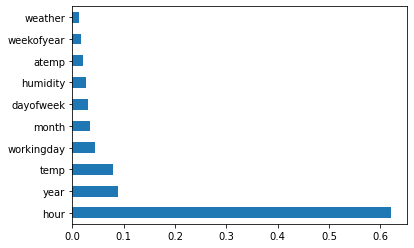

In [26]:
feature_scores.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
sfm = SelectFromModel(model, threshold=0.05)

In [28]:
# Train the selector
sfm.fit(X_reg, y_reg)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=10,
                                                random_state=42),
                threshold=0.05)

In [29]:
feat_labels = X_reg.columns

In [30]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

temp
year
hour


In [31]:
combine.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,dayofweek,weekofyear
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,1,1,2011,0,5,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,1,2011,1,5,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,1,1,2011,2,5,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,1,1,2011,3,5,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,1,1,2011,4,5,52


In [32]:
combine.hour.nunique()

24

In [33]:
combine.year.nunique()

2

In [34]:
combine = pd.get_dummies(combine, columns= ['year'], drop_first = True)
combine.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'day',
       'month', 'hour', 'dayofweek', 'weekofyear', 'year_2012'],
      dtype='object')

In [35]:
combine.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
day              0
month            0
hour             0
dayofweek        0
weekofyear       0
year_2012        0
dtype: int64

In [36]:
test_df = combine[np.isnan(combine.registered)] 
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN,20,1,0,3,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,20,1,1,3,3,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN,20,1,2,3,3,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,20,1,3,3,3,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN,20,1,4,3,3,0


In [37]:
test_df.shape

(6493, 17)

In [38]:
test_df.drop(['casual', 'registered', 'count'], axis = 1, inplace= True)

In [39]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1,0,3,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,1,3,3,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2,3,3,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,3,3,3,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,4,3,3,0


In [40]:
test_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
day           0
month         0
hour          0
dayofweek     0
weekofyear    0
year_2012     0
dtype: int64

In [41]:
train_df = combine[combine.casual.notnull()] 
train_df.shape

(10886, 17)

In [42]:
train_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
month         0
hour          0
dayofweek     0
weekofyear    0
year_2012     0
dtype: int64

In [43]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'day',
       'month', 'hour', 'dayofweek', 'weekofyear', 'year_2012'],
      dtype='object')

In [44]:
features_list  = list(train_df.columns)

In [45]:
features = train_df[features_list]
features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,1,1,0,5,52,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,1,1,1,5,52,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,1,1,2,5,52,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,1,1,3,5,52,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,1,1,4,5,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0,19,12,19,2,51,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0,19,12,20,2,51,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0,19,12,21,2,51,1


In [46]:
features.drop(['count'], axis=1, inplace=True)
features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,1,1,0,5,52,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,1,1,1,5,52,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,1,1,2,5,52,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,1,1,3,5,52,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,1,4,5,52,0


In [47]:
features.drop(['casual','registered'], axis=1, inplace=True)
features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,1,1,0,5,52,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,1,5,52,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,2,5,52,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,3,5,52,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,4,5,52,0


In [48]:
target = train_df['count']

In [49]:
target.head()

datetime
2011-01-01 00:00:00    16.0
2011-01-01 01:00:00    40.0
2011-01-01 02:00:00    32.0
2011-01-01 03:00:00    13.0
2011-01-01 04:00:00     1.0
Name: count, dtype: float64

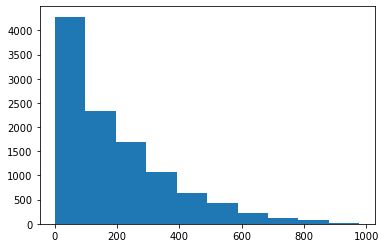

In [50]:

plt.hist(target)
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=42)

**Grid Search in MLR**

In [52]:
from sklearn.preprocessing import PowerTransformer
#pipeline
from sklearn.pipeline import Pipeline

#scalers
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

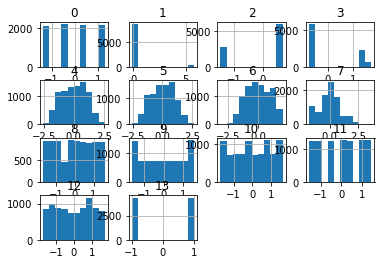

In [53]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
X_train = pipeline.fit_transform(X_train)
X_test =pipeline.transform(X_test)
# convert the array back to a dataframe
dataset = pd.DataFrame(X_train)
# histograms of the variables
dataset.hist()
plt.show()

In [54]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test =scaler.transform(X_test)

In [55]:
#Grid search with MLR


#Create a LR for GridSearch (GS)
reg_with_GS = LinearRegression()

#Create a model parameter list 
param_reg = {'fit_intercept':[True, False], 
             'normalize':[True, False]}

#add k=fold
#Read 
reg_GS = GridSearchCV(reg_with_GS, 
                      param_reg, 
                      cv=3)#cv=10 for k-fold cross-validaton


reg_GS.fit(X_train, y_train)

print('Train score', reg_GS.score(X_train, y_train))

print('Test score', reg_GS.score(X_test,y_test))
#Use: RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)


## Find the best parameters for Regr
print(reg_GS.best_params_)

## Find the best score with the best parameters
print(reg_GS.best_score_)


Train score 0.39120227671222607
Test score 0.3988520300864059
{'fit_intercept': True, 'normalize': True}
0.38874162442615584


**K-nearest Neighbors(KNN)**

In [56]:
knn = KNeighborsRegressor(n_neighbors=7)

In [57]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [58]:
y_pred = cross_val_predict(knn, X_train, y_train, cv=5)

In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
print(sqrt(mean_squared_error(y_train,y_pred))) #for classification cannot be used.
print(r2_score(y_train,y_pred))

126.59257111396086
0.5108323288440504


In [61]:
y_pred2 = cross_val_predict(knn, X_test, y_test, cv=5)

In [62]:
print(r2_score(y_test,y_pred2))

0.4653052499112563


In [63]:
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=5)
    error.append(mean_squared_error(y_train,y_pred)) # we can write r2 score. and choose highest one. 

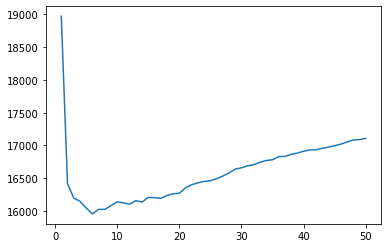

In [64]:
plt.plot(range(1,51),error)

Text(0, 0.5, 'accuracy')

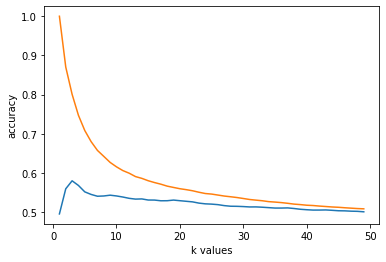

In [65]:
#find optimal k
score_list_test = []
score_list_train = []
for each in range(1,50):
    knn2 = KNeighborsRegressor(n_neighbors= each)
    knn2.fit(X_train, y_train)
    score_list_test.append(knn2.score(X_test,y_test))
    score_list_train.append(knn2.score(X_train,y_train))
plt.plot(range(1, 50), score_list_test)
plt.plot(range(1, 50), score_list_train)
plt.xlabel("k values")
plt.ylabel("accuracy")  

In [66]:
knn = KNeighborsRegressor(n_neighbors=10)

In [67]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [68]:
training_score_knn = knn.score(X_train,y_train) #accuracy score
training_score_knn

0.6157147387034452

In [69]:
testing_score_knn = knn.score(X_test,y_test) #accuracy score
testing_score_knn

0.5414128060518533

In [70]:
y_pred = knn.predict(X_test)

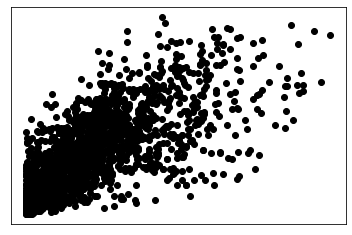

In [71]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [72]:
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,hour,dayofweek,weekofyear,year_2012
datetime,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1,0,3,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,1,3,3,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2,3,3,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,3,3,3,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,4,3,3,0


In [73]:
X_train.shape

(8708, 14)

In [74]:
test_df.shape

(6493, 14)

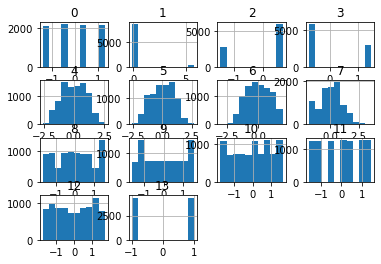

In [75]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
X_train = pipeline.fit_transform(X_train)
X_test =pipeline.transform(X_test)
# convert the array back to a dataframe
dataset = pd.DataFrame(X_train)
# histograms of the variables
dataset.hist()
plt.show()

In [76]:
predict_samples = pipeline.transform(test_df)

In [77]:
#predict_samples = scaler.transform(test_df)

In [78]:
predictions = knn.predict(predict_samples)
#predictions = predictions.astype(int)

In [79]:
test = pd.read_csv('test.csv')

In [80]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [81]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'datetime':test['datetime'],'count':predictions})

#Visualize the first 5 rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,221.4
1,2011-01-20 01:00:00,104.0
2,2011-01-20 02:00:00,114.0
3,2011-01-20 03:00:00,150.9
4,2011-01-20 04:00:00,121.8


In [82]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Bike_Sharing_knn_boxcox.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: Bike_Sharing_knn_boxcox.csv


**Random Forest Regressor**

In [83]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
training_score_rf = rf.score(X_train,y_train) #accuracy score
training_score_rf

0.992970641216765

In [85]:
testing_score_rf = rf.score(X_test,y_test) #accuracy score
testing_score_rf

0.9547214442382926

In [86]:
predictions = rf.predict(predict_samples)

In [87]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'datetime':test['datetime'],'count':predictions})

#Visualize the first 5 rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,344.21
1,2011-01-20 01:00:00,489.97
2,2011-01-20 02:00:00,104.15
3,2011-01-20 03:00:00,106.27
4,2011-01-20 04:00:00,106.27


In [88]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Bike_Sharing_rf.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: Bike_Sharing_rf.csv
